<a href="https://colab.research.google.com/github/SadeenAlsabbagh/Computational_Physics/blob/main/Sadeen_Alsabbagh_HW_Starting_Point_Monte_Carlo_Integration_of_Cos(theta).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot
import math
import random

In [ ]:
# From potentials.py
def u(pos): # Anharmonic Oscillator Potential (SHO + quartic term)
    return 0.5 * pos ** 2 + 0.25 * pos ** 4


The potetial energy is $U=\frac{1}{2}x^2+\frac{1}{4}x^4$, so $F=-\frac{dU}{dx}=-(x+x^3)$.

In [ ]:
# From isolated-dynamics.py
amp = 4.0 # Amplitude of oscillator
delta_t = 10 ** (-6) # time step
t_tot = 10.0 # how long to run the simulation

# Initial conditions:
x = -amp # Released at the outer position.
v = 0.0 # released from rest
t = 0.0

x_pos_iso = [] # I have renamed this x_pos_iso so the array can be saved and compared to the heatbath case.
while t < t_tot: # Go until t=t_tot
    t += delta_t # Increment time
    # Euler Integration
    new_x = x + v * delta_t
    v = v - (x + x ** 3) * delta_t

    x = new_x
    x_pos_iso.append(x) # Saving the value of x at every step.



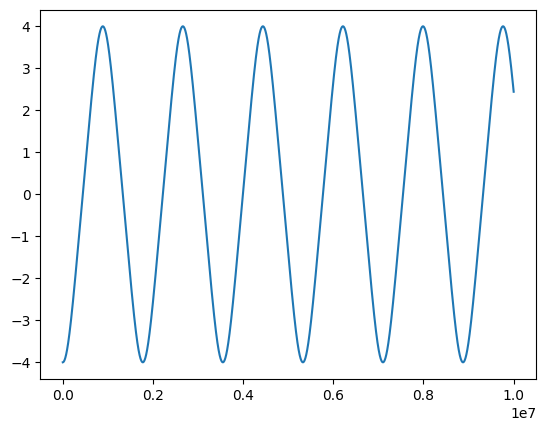

In [ ]:
pyplot.plot(x_pos_iso)

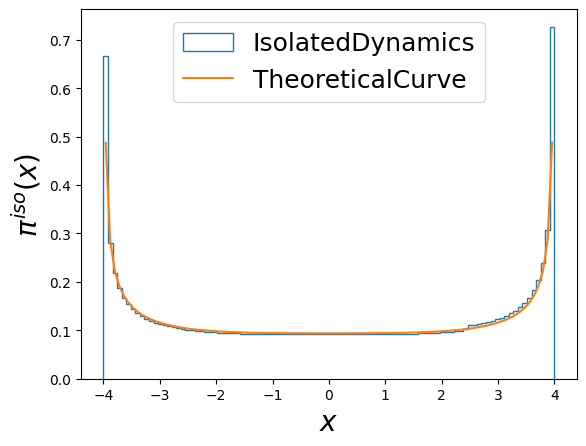

In [ ]:
# pyplot.rcParams["text.usetex"] = True # This is not necessary in Colab
pyplot.xlabel("$x$", fontsize=20) # Remove the rs in front of the label strings.
pyplot.ylabel("$\pi^{iso}(x)$", fontsize=20)

bins_x = np.linspace(min(x_pos_iso), max(x_pos_iso), 100)
pyplot.hist(x_pos_iso, bins_x, label="IsolatedDynamics", density=True, histtype="step")

bins_theoretical = np.linspace(0.99 * min(x_pos_iso), 0.99 * max(x_pos_iso), 100)
norm = 1 / 0.887645
landau_dist = np.array([norm * math.sqrt(2 * (u(amp) - u(x))) ** (-1) for x in bins_theoretical])
pyplot.plot(bins_theoretical, landau_dist, label="TheoreticalCurve")

pyplot.legend(fontsize=18)
pyplot.show()

In [ ]:
# From thermostat-dynamics.py

delta_t = 10 ** (-3) # Timestep
t_tot = 10 ** 4 # When to stop

# Initial conditions
x = -4.0
v = 0.0
t = 0.0

x_pos = []
while t < t_tot:
    t += delta_t # Same as before
    new_x = x + v * delta_t # Same as before
    if x * new_x < 0 and random.random() < 0.5:  # If the particle has just passsed through 0, 50% chance of ...
        v = -(v / abs(v)) * math.sqrt(-2.0 * math.log(random.random())) # Have a collision / interacting with the heat bath
    else:
        v = v - (x + x ** 3) * delta_t # Same as before
        x = new_x # Same as before
    x_pos.append(x)


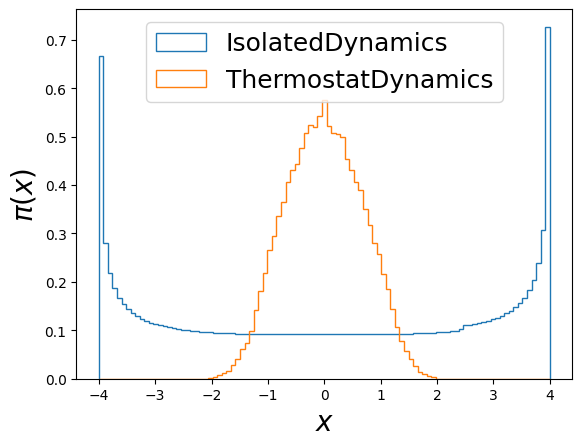

In [ ]:
# Copied the following from the isolated dynamics code, and modified it.

pyplot.xlabel("$x$", fontsize=20)
pyplot.ylabel("$\pi(x)$", fontsize=20)

#bins_x = np.linspace(min(x_pos), max(x_pos), 100) # Just use old bins.
pyplot.hist(x_pos_iso, bins_x, label="IsolatedDynamics", density=True, histtype="step")
pyplot.hist(x_pos, bins_x, label="ThermostatDynamics", density=True, histtype="step")

pyplot.legend(fontsize=18)
pyplot.show()

Integrate the Cos from $\theta$=0 to $\pi/2$.  

Let the sampling area be $\theta=0$ to $\pi/2$ and $y=0$ to 1.

In [ ]:
# generate a lot of random points (theta, y)
thetaArray=[]
yArray=[]
count=0
totalCount=100
for i in range(totalCount):
  theta=random.random()*math.pi/2.
  y=random.random()
  thetaArray.append(theta)
  yArray.append(y)
  # Check if each point satisfies y<=cos(theta)
  if y < np.cos(theta):
    count+=1

print("The integral is: ", (count/totalCount) * 1.*np.pi/2.)

# Calculate the fraction of the sample area
#


The integral is:  0.926769832808989


** Make a plot showing your random points and the curve cos(theta).**

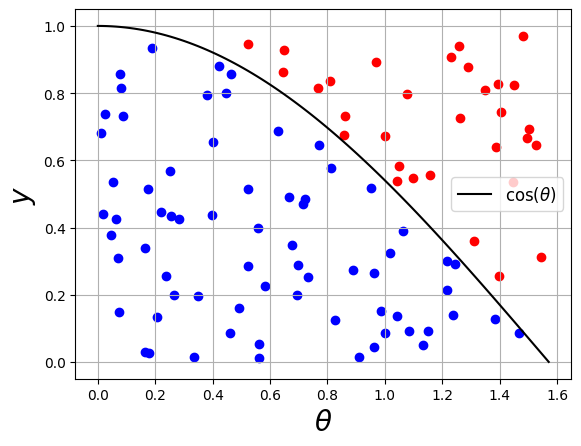

The integral is: 1.0838494654884785


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Generate random points (theta, y)
thetaArray = []
yArray = []
totalCount = 100

for i in range(totalCount):
    theta = random.random() * math.pi / 2.
    y = random.random()
    thetaArray.append(theta)
    yArray.append(y)

    # Check if each point satisfies y <= cos(theta)
    if y < np.cos(theta):
        plt.scatter(theta, y, color='blue')  # Plot points below the curve in blue
    else:
        plt.scatter(theta, y, color='red')  # Plot points above the curve in red

# Plot the curve cos(theta)
theta_values = np.linspace(0, math.pi / 2, 100)
cos_values = np.cos(theta_values)
plt.plot(theta_values, cos_values, color='black', label='$\cos(\\theta)$')

plt.xlabel("$\\theta$", fontsize=20)
plt.ylabel("$y$", fontsize=20)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Calculate the integral as the fraction of points below the curve
count_below_curve = sum(1 for i in range(totalCount) if yArray[i] <= np.cos(thetaArray[i]))
integral = (count_below_curve / totalCount) * (math.pi / 2)
print("The integral is:", integral)


In [ ]:
# Calculate the fraction of the sample area below the curve y = cos(theta)
count_below_curve = sum(1 for i in range(totalCount) if yArray[i] <= np.cos(thetaArray[i]))
fraction_area_below_curve = count_below_curve / totalCount
print("Fraction of sample area below the curve:", fraction_area_below_curve)


Fraction of sample area below the curve: 0.69
